In [1]:
import warnings
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes, fetch_openml,load_iris,fetch_california_housing
from sklearn.feature_selection import mutual_info_regression, f_regression, RFE, SelectFromModel, SelectKBest, f_classif
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import (
RepeatedStratifiedKFold, 
cross_val_score, 
train_test_split, 
GridSearchCV,
cross_val_predict, 
learning_curve, 
validation_curve)
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_absolute_error,zero_one_loss, roc_auc_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.decomposition import PCA
from sklearn.datasets import make_circles, make_moons, make_blobs
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report, mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from os.path import join as pjoin
#sharper plots
%config InlineBackend.figure_format = 'retina'
import seaborn as sns
from sklearn.linear_model import (LogisticRegression, LogisticRegressionCV,
                                  SGDClassifier)
from PIL import Image
import random
warnings.filterwarnings("ignore")
from shutil import copyfile
from sklearn.svm import SVC
import openpyxl

In [2]:
#data_path = r"C:\Users\Acer\Desktop\spbu_ml_2025\data\prices_test.csv"
test_path = r"C:\Users\Acer\Desktop\spbu_ml_2025\data\prices_test.csv"
train_path = r"C:\Users\Acer\Desktop\spbu_ml_2025\data\prices_train.csv"
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

df_test.rename(columns={'Unnamed: 0': 'index'}, inplace=True)
df_train.rename(columns={'Unnamed: 0': 'index'}, inplace=True)

df_train_0 = df_train.copy()
df_test_0 = df_test.copy()

df_test


,index,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,0,2012.833,3.4,NaN,NaN,24.95744,121.53711
1,1,2013.083,34.8,405.21340,1.0,24.97349,121.53372
2,2,2013.500,4.1,2147.37600,3.0,24.96299,121.51284
3,3,2012.917,18.9,1009.23500,0.0,24.96357,121.54951
4,4,2013.417,3.9,2147.37600,3.0,24.96299,121.51284
...,...,...,...,...,...,...,...
78,78,2013.167,21.3,537.79710,4.0,24.97425,121.53814
79,79,2012.917,9.9,279.17260,NaN,24.97528,121.54541
80,80,2013.417,10.5,279.17260,7.0,24.97528,121.54541
81,81,2013.250,17.8,NaN,3.0,24.96731,121.51486


In [3]:
df_train

,index,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,0,2013.083,34.0,157.6052,7.0,24.96628,121.54196,39.1
1,1,2013.500,13.3,561.9845,5.0,24.98746,121.54391,54.8
2,2,2012.917,13.7,1236.5640,1.0,24.97694,121.55391,30.6
3,3,2013.500,8.5,104.8101,5.0,24.96674,121.54067,55.5
4,4,2013.500,13.2,1164.8380,NaN,24.99156,121.53406,34.3
...,...,...,...,...,...,...,...,...
326,326,2013.417,38.5,216.8329,7.0,24.98086,121.54162,41.0
327,327,2013.417,9.7,421.4790,5.0,24.98246,121.54477,49.3
328,328,2012.750,0.0,208.3905,6.0,24.95618,121.53844,44.0
329,329,2013.167,16.2,2288.0110,3.0,24.95885,121.51359,24.4


# Тут я заметил что у нас дома повторяются, менятся год продажи, перепродают дома получается, тогда и NaNы можно заполнить т.к NaN у нас только в X3 distance to the nearest MRT station	X4 number of convenience stores

In [4]:
df_train

,index,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,0,2013.083,34.0,157.6052,7.0,24.96628,121.54196,39.1
1,1,2013.500,13.3,561.9845,5.0,24.98746,121.54391,54.8
2,2,2012.917,13.7,1236.5640,1.0,24.97694,121.55391,30.6
3,3,2013.500,8.5,104.8101,5.0,24.96674,121.54067,55.5
4,4,2013.500,13.2,1164.8380,NaN,24.99156,121.53406,34.3
...,...,...,...,...,...,...,...,...
326,326,2013.417,38.5,216.8329,7.0,24.98086,121.54162,41.0
327,327,2013.417,9.7,421.4790,5.0,24.98246,121.54477,49.3
328,328,2012.750,0.0,208.3905,6.0,24.95618,121.53844,44.0
329,329,2013.167,16.2,2288.0110,3.0,24.95885,121.51359,24.4


In [5]:
df_train['dataset'] = 'train'
df_test['dataset'] = 'test'
df_combined = pd.concat([df_train, df_test])
nan_counts = df_combined.isna().sum()
print(nan_counts)
df_combined

index                                      0
X1 transaction date                        0
X2 house age                               8
X3 distance to the nearest MRT station    12
X4 number of convenience stores           21
X5 latitude                                0
X6 longitude                               0
Y house price of unit area                83
dataset                                    0
dtype: int64


,index,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,dataset
0,0,2013.083,34.0,157.60520,7.0,24.96628,121.54196,39.1,train
1,1,2013.500,13.3,561.98450,5.0,24.98746,121.54391,54.8,train
2,2,2012.917,13.7,1236.56400,1.0,24.97694,121.55391,30.6,train
3,3,2013.500,8.5,104.81010,5.0,24.96674,121.54067,55.5,train
4,4,2013.500,13.2,1164.83800,NaN,24.99156,121.53406,34.3,train
...,...,...,...,...,...,...,...,...,...
78,78,2013.167,21.3,537.79710,4.0,24.97425,121.53814,NaN,test
79,79,2012.917,9.9,279.17260,NaN,24.97528,121.54541,NaN,test
80,80,2013.417,10.5,279.17260,7.0,24.97528,121.54541,NaN,test
81,81,2013.250,17.8,NaN,3.0,24.96731,121.51486,NaN,test


In [6]:

df_combined['X4 number of convenience stores'] = df_combined.groupby('X5 latitude')['X4 number of convenience stores'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x.mean())
)
df_combined['X3 distance to the nearest MRT station'] = df_combined.groupby('X5 latitude')['X3 distance to the nearest MRT station'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x.mean())
)
df_combined['X3 distance to the nearest MRT station'] = df_combined.groupby('X6 longitude')['X3 distance to the nearest MRT station'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x.mean())
)

df_combined['X2 house age'] = df_combined.groupby('X5 latitude')['X2 house age'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x.mean())
)
df_combined_with_nan = df_combined[df_combined.isna().any(axis=1)]
nan_counts = df_combined.isna().sum()
print(nan_counts)

df_combined_with_nan.head(5)

index                                      0
X1 transaction date                        0
X2 house age                               5
X3 distance to the nearest MRT station     3
X4 number of convenience stores            9
X5 latitude                                0
X6 longitude                               0
Y house price of unit area                83
dataset                                    0
dtype: int64


,index,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,dataset
12,12,2013.250,NaN,122.3619,8.0,24.96756,121.54230,67.7,train
33,33,2013.417,NaN,197.1338,6.0,24.97631,121.54436,42.5,train
52,52,2013.500,14.4,NaN,1.0,24.97369,121.52979,50.2,train
110,110,2013.583,27.3,337.6016,NaN,24.96431,121.54063,36.5,train
112,112,2013.167,11.6,201.8939,NaN,24.98489,121.54121,55.9,train


In [7]:
def fill_missing_values(row, df, target_column, distance_column):
    """Заполняет пропущенные значения в target_column ближайшим значением по distance_column."""
    if pd.notna(row[target_column]):
        return row[target_column]

    # Убираем строки с NaN в distance_column и target_column
    filtered_df = df[(df[distance_column].notna()) & (df[target_column].notna())]

    if filtered_df.empty:
        return np.nan

    # Находим ближайшее значение
    distances = (filtered_df[distance_column] - row[distance_column]).abs()
    closest_index = distances.idxmin()
    
    return filtered_df.loc[closest_index, target_column]
df_combined['X2 house age'] = df_combined.apply(
    lambda row: fill_missing_values(row, df_combined, 'X2 house age', 'X5 latitude'), axis=1)

df_combined['X3 distance to the nearest MRT station'] = df_combined.apply(
    lambda row: fill_missing_values(row, df_combined, 'X3 distance to the nearest MRT station', 'X6 longitude'), axis=1)

df_combined['X4 number of convenience stores'] = df_combined.apply(
    lambda row: fill_missing_values(row, df_combined, 'X4 number of convenience stores', 'X6 longitude'), axis=1)

df_combined_with_nan = df_combined[df_combined.isna().any(axis=1)]
nan_counts = df_combined.isna().sum()
print(nan_counts)

df_combined_with_nan.head(5)

index                                      0
X1 transaction date                        0
X2 house age                               0
X3 distance to the nearest MRT station     0
X4 number of convenience stores            0
X5 latitude                                0
X6 longitude                               0
Y house price of unit area                83
dataset                                    0
dtype: int64


,index,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,dataset
0,0,2012.833,3.4,56.47425,7.0,24.95744,121.53711,NaN,test
1,1,2013.083,34.8,405.21340,1.0,24.97349,121.53372,NaN,test
2,2,2013.500,4.1,2147.37600,3.0,24.96299,121.51284,NaN,test
3,3,2012.917,18.9,1009.23500,0.0,24.96357,121.54951,NaN,test
4,4,2013.417,3.9,2147.37600,3.0,24.96299,121.51284,NaN,test


In [8]:
# Преобразуем object в числовые значения
for col in ['X2 house age', 'X4 number of convenience stores']:
    df_combined[col] = pd.to_numeric(df_combined[col], errors='coerce')

df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 414 entries, 0 to 82
Data columns (total 9 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   index                                   414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            412 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         412 non-null    float64
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              331 non-null    float64
 8   dataset                                 414 non-null    object 
dtypes: float64(7), int64(1), object(1)
memory usage: 32.3+ KB


In [9]:

df_train_1 = df_combined[df_combined['dataset'] == 'train'].drop(columns=['dataset'])
df_test_1 = df_combined[df_combined['dataset'] == 'test'].drop(columns=['dataset'])
nan_counts = df_train_1.isna().sum()
print(nan_counts)
nan_counts = df_test_1.isna().sum()
print(nan_counts)


index                                     0
X1 transaction date                       0
X2 house age                              2
X3 distance to the nearest MRT station    0
X4 number of convenience stores           2
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64
index                                      0
X1 transaction date                        0
X2 house age                               0
X3 distance to the nearest MRT station     0
X4 number of convenience stores            0
X5 latitude                                0
X6 longitude                               0
Y house price of unit area                83
dtype: int64


In [10]:
df_train_1.fillna(df_train_1.median(numeric_only=True), inplace=True)

In [11]:
df_train_1_with_nan = df_train_1[df_train_1.isna().any(axis=1)]
nan_counts = df_train_1.isna().sum()
print(nan_counts)

df_train_1_with_nan.head(5)

index                                     0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64


,index,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area


In [12]:
df_test_1 = df_test_1.drop(columns=['Y house price of unit area'])
df_test_1.tail(5)

,index,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
78,78,2013.167,21.3,537.79710,4.0,24.97425,121.53814
79,79,2012.917,9.9,279.17260,7.0,24.97528,121.54541
80,80,2013.417,10.5,279.17260,7.0,24.97528,121.54541
81,81,2013.250,17.8,1783.18000,3.0,24.96731,121.51486
82,82,2012.667,1.5,23.38284,7.0,24.96772,121.54102


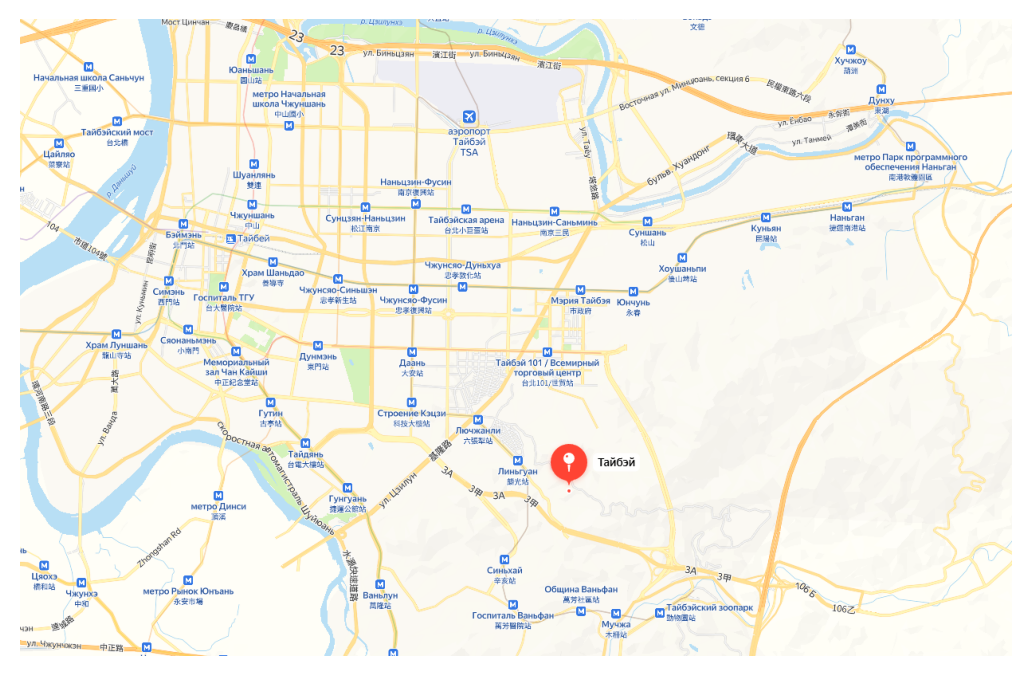

In [13]:
image_path = 'C:\\Users\\Acer\\Documents\\Lightshot\\Screenshot_89.png'
img = Image.open(image_path)

# Display the image using matplotlib
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()

In [14]:
def corrplot(d: pd.DataFrame) -> None:
  corr = d.corr()
  mask = np.triu(np.ones_like(corr, dtype=bool))
  figsize = (min(d.shape[1], 11), min(d.shape[1], 9))
  f, ax = plt.subplots(figsize=figsize)
  cmap = sns.diverging_palette(230, 20, as_cmap=True)
  sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
              square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
  

In [15]:
import pandas as pd

def FutureEngeneeringGeneration(df_gen, start_date, start_latitude, start_longitude, end_date, end_latitude, end_longitude):
    df_gen = df_gen.copy()

    df_gen['X1 transaction date'] = df_gen['X1 transaction date'] - start_date
    df_gen['X5 latitude'] = df_gen['X5 latitude'] - start_latitude
    df_gen['X6 longitude'] = df_gen['X6 longitude'] - start_longitude

    df_gen['Month'] = df_gen['X1 transaction date'].apply(lambda x: ((int((x - int(x)) * 12) + 1))) # Extract month (1 to 12)
    # Add a 'Season' column based on the month
    def get_season(month):
        if month in [12, 1, 2]:
            return 1
        elif month in [3, 4, 5]:
            return 2
        elif month in [6, 7, 8]:
            return 3
        elif month in [9, 10, 11]:
            return 4

    df_gen['Season'] = df_gen['Month'].apply(get_season)

    return df_gen

start_latitude = 24.93207
start_longitude = 121.47353
start_date = 2012.585

end_latitude = 25.01459
end_longitude = 121.56627
end_date = 2013.584

df_train_1 = FutureEngeneeringGeneration(df_train_1, start_date, start_latitude, start_longitude, end_date, end_latitude, end_longitude)
df_test_1 = FutureEngeneeringGeneration(df_test_1, start_date, start_latitude, start_longitude, end_date, end_latitude, end_longitude)

df_train_1.sample(5)


,index,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,Month,Season
330,330,0.332,8.9,1406.4300,0.0,0.05366,0.05405,48.0,4,2
326,326,0.832,38.5,216.8329,7.0,0.04879,0.06809,41.0,10,4
71,71,0.415,19.2,461.1016,5.0,0.02218,0.06637,32.9,5,2
231,231,0.165,7.8,104.8101,5.0,0.03467,0.06714,47.0,2,1
5,5,0.332,8.0,104.8101,5.0,0.03467,0.06714,51.8,4,2


In [16]:
df_test_1.sample(5)

,index,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Month,Season
43,43,0.582,27.5,394.0173,7.0,0.04098,0.06641,7,3
65,65,0.248,0.0,274.0144,1.0,0.04273,0.05706,3,2
6,6,0.082,20.4,2469.6450,4.0,0.02901,0.03693,1,1
49,49,0.165,3.2,489.8821,8.0,0.03810,0.07141,2,1
64,64,0.332,17.7,451.6419,8.0,0.03738,0.07137,4,2


In [17]:
nan_counts = df_train_1.isna().sum()
print(nan_counts)

index                                     0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
Month                                     0
Season                                    0
dtype: int64


In [18]:
df_train_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 331 entries, 0 to 330
Data columns (total 10 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   index                                   331 non-null    int64  
 1   X1 transaction date                     331 non-null    float64
 2   X2 house age                            331 non-null    float64
 3   X3 distance to the nearest MRT station  331 non-null    float64
 4   X4 number of convenience stores         331 non-null    float64
 5   X5 latitude                             331 non-null    float64
 6   X6 longitude                            331 non-null    float64
 7   Y house price of unit area              331 non-null    float64
 8   Month                                   331 non-null    int64  
 9   Season                                  331 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 28.4 KB


In [19]:
df_train_2 = df_train_1.drop(columns=['index', 'X6 longitude', 'Season'])
df_test_2 = df_test_1.drop(columns=['index', 'X6 longitude', 'Season'])

In [20]:
df_train_3 = df_train_2.copy()
df_test_3 = df_test_2.copy()
df_train_3['X3 distance to the nearest MRT station'] = np.log(df_train_3['X3 distance to the nearest MRT station'])
df_test_3['X3 distance to the nearest MRT station'] = np.log(df_test_3['X3 distance to the nearest MRT station'])

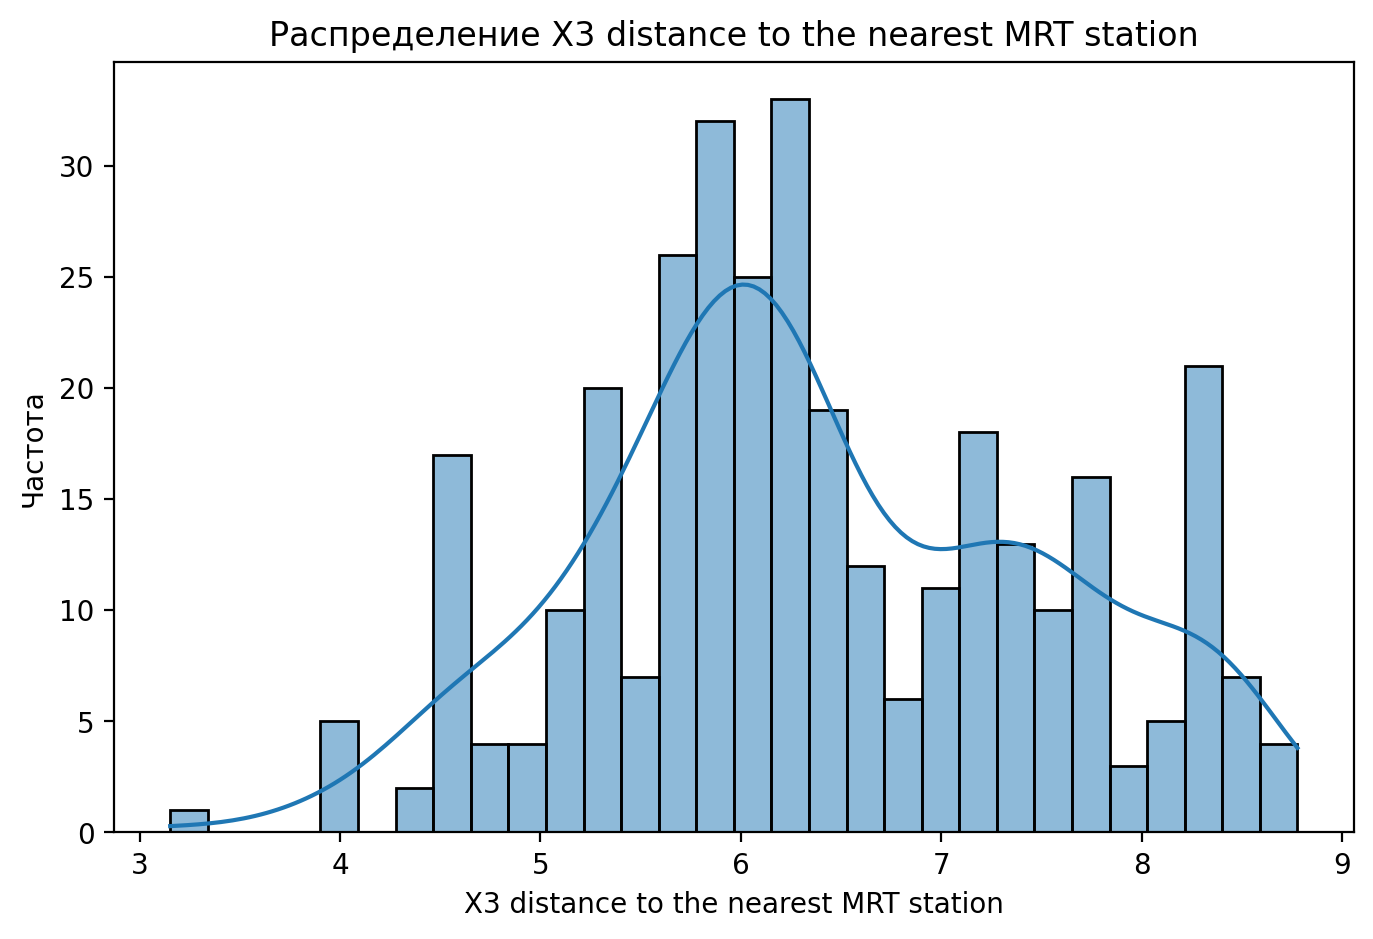

In [21]:
# Строим гистограмму Total Yield с разными цветами
plt.figure(figsize=(8, 5))
sns.histplot(df_train_3, x='X3 distance to the nearest MRT station', kde=True, bins=30)
plt.title('Распределение X3 distance to the nearest MRT station')
plt.xlabel('X3 distance to the nearest MRT station')
plt.ylabel("Частота")
plt.show()

In [22]:
# Define features (X) and target (y)
x_train, x_test = df_train_3.drop(columns=['Y house price of unit area']), df_test_3
y_train =  df_train_3['Y house price of unit area']

print(f"Training set size: {x_train.shape}")
print(f"Test set size: {x_test.shape}")

model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

Training set size: (331, 6)
Test set size: (83, 6)


In [23]:
X = df_train_3.drop(columns=['Y house price of unit area'])  # Drop target from features
y = df_train_3['Y house price of unit area']  # Target variable

# Split into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {x_train.shape}")
print(f"Test set size: {x_test.shape}")

model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)  # Get model predictions
mse = mean_squared_error(y_test, y_pred)  # Compute MSE

print(f"Model score is: {model.score(x_test, y_test)}")  # R² score
print(f"Mean Squared Error (MSE) is: {mse}")  # MSE

Training set size: (264, 6)
Test set size: (67, 6)
Model score is: 0.6919636603422994
Mean Squared Error (MSE) is: 61.52600507681161


In [24]:
df_train_0 = df_train_0.dropna()
X = df_train_0.dropna().drop(columns=['Y house price of unit area'])  # Drop target from features
y = df_train_0.dropna()['Y house price of unit area']  # Target variable

# Split into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {x_train.shape}")
print(f"Test set size: {x_test.shape}")

model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)  # Get model predictions
mse = mean_squared_error(y_test, y_pred)  # Compute MSE

print(f"Model score is: {model.score(x_test, y_test)}")  # R² score
print(f"Mean Squared Error (MSE) is: {mse}")  # MSE

Training set size: (242, 7)
Test set size: (61, 7)
Model score is: 0.730993048750805
Mean Squared Error (MSE) is: 45.269413676890956


In [25]:
df_train_1 = FutureEngeneeringGeneration(df_train_0, start_date, start_latitude, start_longitude, end_date, end_latitude, end_longitude)
df_test_1 = FutureEngeneeringGeneration(df_test_0, start_date, start_latitude, start_longitude, end_date, end_latitude, end_longitude)


In [26]:
df_train_2 = df_train_1.drop(columns=['index', 'X6 longitude', 'Season'])
df_test_2 = df_test_1.drop(columns=['index', 'X6 longitude', 'Season'])

In [27]:
df_test_2

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,Month
0,0.248,3.4,NaN,NaN,0.02537,3
1,0.498,34.8,405.21340,1.0,0.04142,6
2,0.915,4.1,2147.37600,3.0,0.03092,11
3,0.332,18.9,1009.23500,0.0,0.03150,4
4,0.832,3.9,2147.37600,3.0,0.03092,10
...,...,...,...,...,...,...
78,0.582,21.3,537.79710,4.0,0.04218,7
79,0.332,9.9,279.17260,NaN,0.04321,4
80,0.832,10.5,279.17260,7.0,0.04321,10
81,0.665,17.8,NaN,3.0,0.03524,8


In [28]:
df_train_3 = df_train_2.copy()
df_test_3 = df_test_2.copy()
df_train_3['X3 distance to the nearest MRT station'] = np.log(df_train_3['X3 distance to the nearest MRT station'])
df_test_3['X3 distance to the nearest MRT station'] = np.log(df_test_3['X3 distance to the nearest MRT station'])

In [29]:

X = df_train_3.drop(columns=['Y house price of unit area'])  # Drop target from features
y = df_train_3['Y house price of unit area']  # Target variable

# Split into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {x_train.shape}")
print(f"Test set size: {x_test.shape}")

model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)  # Get model predictions
mse = mean_squared_error(y_test, y_pred)  # Compute MSE

print(f"Model score is: {model.score(x_test, y_test)}")  # R² score
print(f"Mean Squared Error (MSE) is: {mse}")  # MSE

Training set size: (242, 6)
Test set size: (61, 6)
Model score is: 0.7891586913341407
Mean Squared Error (MSE) is: 35.481099569542806


In [30]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

# Делим данные
X = df_train_3.drop(columns=['Y house price of unit area',])
y = df_train_3['Y house price of unit area']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Хранение результатов
best_degree = 0
best_mse = float('inf')

for degree in range(1, 20):
    try:
        poly = PolynomialFeatures(degree=degree, include_bias=False)
        x_train_poly = poly.fit_transform(x_train)
        x_test_poly = poly.transform(x_test)

        model = LinearRegression()
        model.fit(x_train_poly, y_train)
        y_pred = model.predict(x_test_poly)

        mse = mean_squared_error(y_test, y_pred)

        if mse < best_mse:
            best_mse = mse
            best_degree = degree

        print(f"Degree {degree:2d}: MSE = {mse:.4f}, R² = {model.score(x_test_poly, y_test):.4f}")
    except Exception as e:
        print(f"Degree {degree:2d}: FAILED - {e}")

print(f"\n✅ Best degree: {best_degree} with MSE = {best_mse}")



Degree  1: MSE = 35.4811, R² = 0.7892
Degree  2: MSE = 39.3777, R² = 0.7660
Degree  3: MSE = 59.5039, R² = 0.6464
Degree  4: MSE = 534.6160, R² = -2.1769
Degree  5: MSE = 38806.8129, R² = -229.6039
Degree  6: MSE = 47966.7054, R² = -284.0352
Degree  7: MSE = 96255.9385, R² = -570.9870
Degree  8: MSE = 201112.8519, R² = -1194.0841
Degree  9: MSE = 1110780.0694, R² = -6599.6501
Degree 10: MSE = 2463057.4063, R² = -14635.3628
Degree 11: MSE = 53768306.7464, R² = -319509.3956
Degree 12: MSE = 783742595.0238, R² = -4657276.1531
Degree 13: MSE = 694379846.1170, R² = -4126250.9269
Degree 14: MSE = 398267232.6408, R² = -2366644.4971
Degree 15: MSE = 76668863.9592, R² = -455592.6487
Degree 16: MSE = 43489273.8336, R² = -258427.7274
Degree 17: MSE = 14050648.6527, R² = -83492.9499
Degree 18: MSE = 78808366.0729, R² = -468306.3309
Degree 19: MSE = 59739168.2955, R² = -354990.3778

✅ Best degree: 1 with MSE = 35.481099569542984


In [31]:
import statsmodels.api as sm

# Add a constant (intercept) for statsmodels
X_train_sm = sm.add_constant(x_train)  

# Fit the model using statsmodels
model_sm = sm.OLS(y_train, X_train_sm).fit()

# Display the summary, which includes t-tests, p-values, R², and more
print(model_sm.summary())

                                OLS Regression Results                                
Dep. Variable:     Y house price of unit area   R-squared:                       0.635
Model:                                    OLS   Adj. R-squared:                  0.626
Method:                         Least Squares   F-statistic:                     68.19
Date:                        Sat, 05 Apr 2025   Prob (F-statistic):           1.01e-48
Time:                                01:19:43   Log-Likelihood:                -862.96
No. Observations:                         242   AIC:                             1740.
Df Residuals:                             235   BIC:                             1764.
Df Model:                                   6                                         
Covariance Type:                    nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

In [32]:
df_train_4 = df_train_3.drop(columns=['X4 number of convenience stores','Month'])
df_test_4 = df_test_3.drop(columns=['X4 number of convenience stores','Month'])

In [33]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

# Делим данные
X = df_train_4.drop(columns=['Y house price of unit area'])
# Преобразуем возраст в возраст на квадрат (например, для выявления нелинейных зависимостей)
y = df_train_4['Y house price of unit area']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Хранение результатов
best_degree = 0
best_mse = float('inf')

for degree in range(1, 20):
    try:
        poly = PolynomialFeatures(degree=degree, include_bias=False)
        x_train_poly = poly.fit_transform(x_train)
        x_test_poly = poly.transform(x_test)

        model = LinearRegression()
        model.fit(x_train_poly, y_train)
        y_pred = model.predict(x_test_poly)

        mse = mean_squared_error(y_test, y_pred)

        if mse < best_mse:
            best_mse = mse
            best_degree = degree

        print(f"Degree {degree:2d}: MSE = {mse:.4f}, R² = {model.score(x_test_poly, y_test):.4f}")
    except Exception as e:
        print(f"Degree {degree:2d}: FAILED - {e}")

print(f"\n✅ Best degree: {best_degree} with MSE = {best_mse}")



Degree  1: MSE = 36.3800, R² = 0.7838
Degree  2: MSE = 31.1222, R² = 0.8151
Degree  3: MSE = 36.1026, R² = 0.7855
Degree  4: MSE = 87.3194, R² = 0.4811
Degree  5: MSE = 3643.5667, R² = -20.6514
Degree  6: MSE = 8286.4452, R² = -48.2410
Degree  7: MSE = 3420.8532, R² = -19.3279
Degree  8: MSE = 16950.8520, R² = -99.7280
Degree  9: MSE = 1307.4207, R² = -6.7692
Degree 10: MSE = 4487.8478, R² = -25.6684
Degree 11: MSE = 14735.2294, R² = -86.5620
Degree 12: MSE = 36413.4308, R² = -215.3816
Degree 13: MSE = 36292.9333, R² = -214.6655
Degree 14: MSE = 17818.2198, R² = -104.8822
Degree 15: MSE = 22571.6902, R² = -133.1290
Degree 16: MSE = 11282.1741, R² = -66.0427
Degree 17: MSE = 359117.7466, R² = -2133.0053
Degree 18: MSE = 42329.9050, R² = -250.5393
Degree 19: MSE = 695933.9856, R² = -4134.4872

✅ Best degree: 2 with MSE = 31.12224857746736


In [34]:
import statsmodels.api as sm

# Add a constant (intercept) for statsmodels
X_train_sm = sm.add_constant(x_train)  

# Fit the model using statsmodels
model_sm = sm.OLS(y_train, X_train_sm).fit()

# Display the summary, which includes t-tests, p-values, R², and more
print(model_sm.summary())

                                OLS Regression Results                                
Dep. Variable:     Y house price of unit area   R-squared:                       0.633
Model:                                    OLS   Adj. R-squared:                  0.627
Method:                         Least Squares   F-statistic:                     102.4
Date:                        Sat, 05 Apr 2025   Prob (F-statistic):           1.70e-50
Time:                                01:19:44   Log-Likelihood:                -863.53
No. Observations:                         242   AIC:                             1737.
Df Residuals:                             237   BIC:                             1754.
Df Model:                                   4                                         
Covariance Type:                    nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

In [35]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Пример различных функций активации
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def tanh(x):
    return np.tanh(x)

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

def log_transform(x):
    return np.log1p(x)

# Список всех функций
activation_functions = {
    'sigmoid': sigmoid,
    'relu': relu,
    'tanh': tanh,
    'leaky_relu': leaky_relu,
    'log_transform': log_transform
}

# Делим данные
X = df_train_4.drop(columns=['Y house price of unit area'])
y = df_train_4['Y house price of unit area']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Хранение результатов
best_func = ''
best_degree = 0
best_mse = float('inf')

# Перебираем все функции активации
for func_name, func in activation_functions.items():
    try:
        # Применяем функцию к данным
        X_train_transformed = func(x_train)
        X_test_transformed = func(x_test)

        # Применение полиномиальных признаков
        best_degree_func = 0
        best_mse_func = float('inf')

        for degree in range(1, 20):
            poly = PolynomialFeatures(degree=degree, include_bias=False)
            x_train_poly = poly.fit_transform(X_train_transformed)
            x_test_poly = poly.transform(X_test_transformed)

            # Обучение модели
            model = LinearRegression()
            model.fit(x_train_poly, y_train)
            y_pred = model.predict(x_test_poly)

            mse = mean_squared_error(y_test, y_pred)

            if mse < best_mse_func:
                best_mse_func = mse
                best_degree_func = degree

            print(f"Function: {func_name}, Degree {degree:2d}: MSE = {mse:.4f}, R² = {model.score(x_test_poly, y_test):.4f}")

        if best_mse_func < best_mse:
            best_mse = best_mse_func
            best_func = func_name
            best_degree = best_degree_func

    except Exception as e:
        print(f"Function {func_name} failed: {e}")

print(f"\n✅ Best function: {best_func}, Best degree: {best_degree} with MSE = {best_mse}")


Function: sigmoid, Degree  1: MSE = 52.9962, R² = 0.6851
Function: sigmoid, Degree  2: MSE = 73.6907, R² = 0.5621
Function: sigmoid, Degree  3: MSE = 1314.7702, R² = -6.8128
Function: sigmoid, Degree  4: MSE = 3279447.9581, R² = -19486.6457
Function: sigmoid, Degree  5: MSE = 127160038214.1544, R² = -755630156.8119
Function: sigmoid, Degree  6: MSE = 3482785996581.4878, R² = -20695952667.6346
Function: sigmoid, Degree  7: MSE = 6106040233785.7734, R² = -36284262022.3477
Function: sigmoid, Degree  8: MSE = 950531017086.1321, R² = -5648393256.2925
Function: sigmoid, Degree  9: MSE = 39848343129371.5312, R² = -236793022636.1830
Function: sigmoid, Degree 10: MSE = 47839642345689.5000, R² = -284280163822.6208
Function: sigmoid, Degree 11: MSE = 50490285305317.6875, R² = -300031226703.8198
Function: sigmoid, Degree 12: MSE = 43255400256068.3203, R² = -257038967435.1635
Function: sigmoid, Degree 13: MSE = 32420031300424.6875, R² = -192651352671.2063
Function: sigmoid, Degree 14: MSE = 2217643

In [36]:
#import numpy as np
#import pandas as pd
#from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import PolynomialFeatures
#from sklearn.metrics import mean_squared_error
#import statsmodels.api as sm
#import matplotlib.pyplot as plt
#
## Делим данные
#X = df_train_4.drop(columns=['Y house price of unit area'])
#y = df_train_4['Y house price of unit area']
#x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#
## Полиномиальные признаки
#poly = PolynomialFeatures(degree=2, include_bias=False)
#x_train_poly = poly.fit_transform(x_train)
#x_test_poly = poly.transform(x_test)
#
## Применим ReLU (обнуляем отрицательные значения)
#x_train_relu = np.maximum(0, x_train_poly)
#x_test_relu = np.maximum(0, x_test_poly)
#
## Добавляем константу для statsmodels
#x_train_relu = sm.add_constant(x_train_relu)
#x_test_relu = sm.add_constant(x_test_relu)
#
#results = []
#quantiles = np.arange(0.001, 1.0, 0.001)
#
#for q in quantiles:
#    try:
#        model = sm.QuantReg(y_train, x_train_relu)
#        res = model.fit(q=q, disp=False)
#        y_pred = res.predict(x_test_relu)
#        mse = mean_squared_error(y_test, y_pred)
#        results.append((q, mse))
#    except Exception as e:
#        print(f"Quantile {q:.3f} failed: {e}")
#
## В датафрейм
#results_df = pd.DataFrame(results, columns=['quantile', 'mse'])
#
## Лучшая квантиль
#best_row = results_df.loc[results_df['mse'].idxmin()]
#print(f"\n✅ Best quantile: {best_row['quantile']:.3f} with MSE = {best_row['mse']:.4f}")
#
## График
#plt.figure(figsize=(12, 6))
#plt.plot(results_df['quantile'], results_df['mse'], color='darkorange')
#plt.title("Quantile Regression (ReLU + Poly) — MSE vs Quantile")
#plt.xlabel("Quantile")
#plt.ylabel("MSE")
#plt.grid(True)
#plt.tight_layout()
#plt.show()



✅ Best quantile: 0.5387220000000208 with MSE = 29.3877


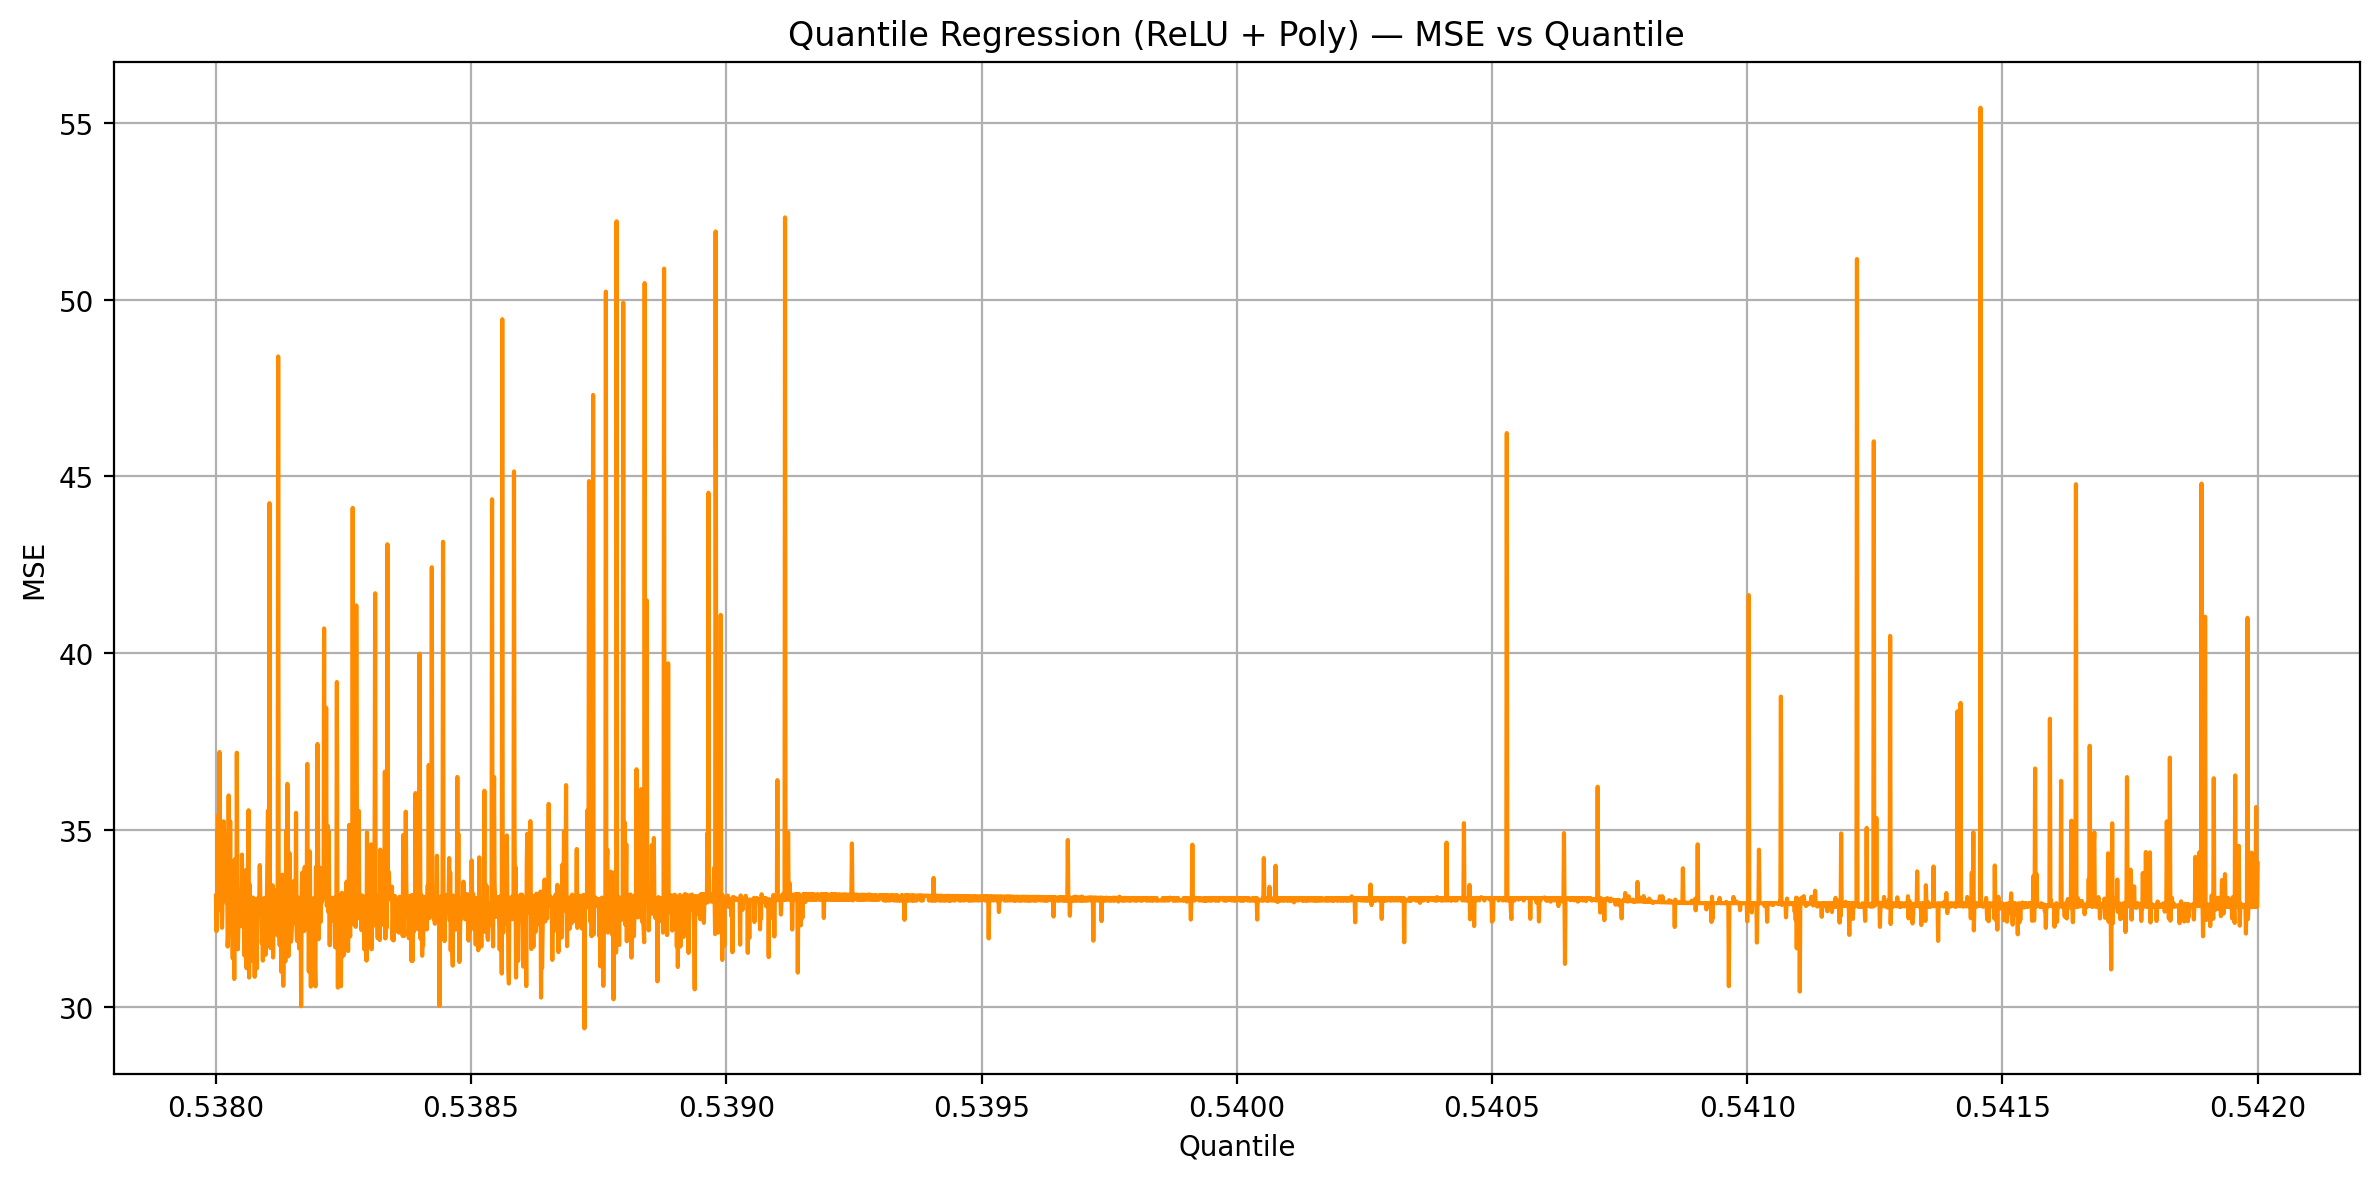

In [49]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
warnings.filterwarnings('ignore')
# Загружаем данные
X = df_train_4.drop(columns=['Y house price of unit area'])
y = df_train_4['Y house price of unit area']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Обучаем модель Random Forest
rf_model = RandomForestRegressor(bootstrap=True, max_depth=None, max_features='sqrt',min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=42)
rf_model.fit(x_train, y_train)

# 2. Получаем предсказания Random Forest и используем их как новые признаки
rf_train_preds = rf_model.predict(x_train).reshape(-1, 1)
rf_test_preds = rf_model.predict(x_test).reshape(-1, 1)

# 3. Дополняем исходные признаки новыми признаками (предсказания Random Forest)
x_train_extended = np.hstack((x_train, rf_train_preds))
x_test_extended = np.hstack((x_test, rf_test_preds))

x_train_extended, x_test_extended, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Полиномиальные признаки
poly = PolynomialFeatures(degree=2, include_bias=False)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

# Применим ReLU (обнуляем отрицательные значения)
x_train_relu = np.maximum(0, x_train_poly)
x_test_relu = np.maximum(0, x_test_poly)

# Добавляем константу для statsmodels
x_train_relu = sm.add_constant(x_train_relu)
x_test_relu = sm.add_constant(x_test_relu)

results = []
quantiles = np.arange(0.538, 0.542, 0.000001)

for q in quantiles:
    try:
        model = sm.QuantReg(y_train, x_train_relu)
        res = model.fit(q=q, disp=False, method='bfgs')
        y_pred = res.predict(x_test_relu)
        mse = mean_squared_error(y_test, y_pred)
        results.append((q, mse))
    except Exception as e:
        print(f"Quantile {q:.3f} failed: {e}")

# В датафрейм
results_df = pd.DataFrame(results, columns=['quantile', 'mse'])

# Лучшая квантиль
best_row = results_df.loc[results_df['mse'].idxmin()]
print(f"\n✅ Best quantile: {best_row['quantile']} with MSE = {best_row['mse']:.4f}")

# График
plt.figure(figsize=(12, 6))
plt.plot(results_df['quantile'], results_df['mse'], color='darkorange')
plt.title("Quantile Regression (ReLU + Poly) — MSE vs Quantile")
plt.xlabel("Quantile")
plt.ylabel("MSE")
plt.grid(True)
plt.tight_layout()
plt.show()



In [44]:
df_test_4

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X5 latitude
0,0.248,3.4,NaN,0.02537
1,0.498,34.8,6.004414,0.04142
2,0.915,4.1,7.672002,0.03092
3,0.332,18.9,6.916948,0.03150
4,0.832,3.9,7.672002,0.03092
...,...,...,...,...
78,0.582,21.3,6.287481,0.04218
79,0.332,9.9,5.631830,0.04321
80,0.832,10.5,5.631830,0.04321
81,0.665,17.8,NaN,0.03524


In [50]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer
import statsmodels.api as sm

# Загружаем данные
X_train, Y_train = df_train_4.drop(columns=['Y house price of unit area']), df_train_4['Y house price of unit area']
X_test = df_test_4

# 1. Обучаем модель Random Forest
rf_model = RandomForestRegressor(bootstrap=True, max_depth=None, max_features='sqrt',min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=42)
rf_model.fit(X_train, Y_train)

# 2. Получаем предсказания Random Forest и используем их как новые признаки
rf_train_preds = rf_model.predict(X_train).reshape(-1, 1)
rf_test_preds = rf_model.predict(X_test).reshape(-1, 1)

# 3. Дополняем исходные признаки новыми признаками (предсказания Random Forest)
X_train_extended = np.hstack((X_train, rf_train_preds))
X_test_extended = np.hstack((X_test, rf_test_preds))

# Импутируем пропущенные значения с помощью стратегии 'mean' (среднее)
imputer = SimpleImputer(strategy='mean')

# Применяем импритирование для обучающего и тестового набора
X_train_extended_imputed = imputer.fit_transform(X_train_extended)
X_test_extended_imputed = imputer.transform(X_test_extended)

# Полиномиальные признаки
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_extended_imputed)
X_test_poly = poly.transform(X_test_extended_imputed)

# Применим ReLU (обнуляем отрицательные значения)
X_train_relu = np.maximum(0, X_train_poly)
X_test_relu = np.maximum(0, X_test_poly)

# Добавляем константу для statsmodels
X_train_relu = sm.add_constant(X_train_relu)
X_test_relu = sm.add_constant(X_test_relu)

# Обучаем модель QuantReg (квантильная регрессия)
quantile = 0.5387220000000208 
model = sm.QuantReg(Y_train, X_train_relu)
res = model.fit(q=quantile, disp=False, method='bfgs')
y_pred = res.predict(X_test_relu)

# Подготовим DataFrame для отправки
submission = pd.DataFrame({
    'index': df_test_1['index'],  # Замените на 'df_test_4["ID"]', если у вас есть столбец с ID
    'Y house price of unit area': y_pred
})

# Сохраняем результат в CSV файл
submission.to_csv('submission.csv', index=False)
